### Загрузка библиотек

In [26]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
import matplotlib.pyplot as plt 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Загрузка изображений

In [27]:
img_1= tf.io.read_file('drive/MyDrive/Colab Notebooks/Internship/lesson_15/images/01.jpg')
img_2= tf.io.read_file('drive/MyDrive/Colab Notebooks/Internship/lesson_15/images/02.jpg')

### Декодирование изображений из формата JPEG в тензор uint8

In [28]:
img_decode_1 = tf.io.decode_jpeg(img_1)
img_decode_2 = tf.io.decode_jpeg(img_2)

### Сложение изображений

In [29]:
result = img_decode_1 + img_decode_2

### Сохранение результата в отдельный файл

In [30]:
tf.keras.utils.save_img('drive/MyDrive/Colab Notebooks/Internship/lesson_15/results/result.jpg', result)

### Графическое отображение результата сложения изображений

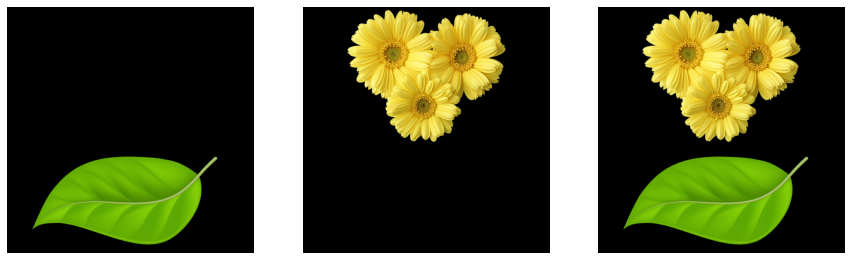

In [31]:
fig = plt.figure(figsize=(15, 5))

#Draw 1x3, 1 lines, 3 columns, 3 figures, numbering starts from 1
ax = fig.add_subplot(131)
ax.imshow(img_decode_1)
ax.axis('off')

ax = fig.add_subplot(132)
ax.imshow(img_decode_2)
ax.axis('off')

ax = fig.add_subplot(133)
ax.imshow(result)
ax.axis('off')

plt.show()

### Эксперименты

In [32]:
test_1 = img_decode_1 - img_decode_2
tf.keras.utils.save_img('drive/MyDrive/Colab Notebooks/Internship/lesson_15/results/test_1.jpg', test_1)

In [33]:
test_2 = img_decode_1 + 2 * img_decode_2
tf.keras.utils.save_img('drive/MyDrive/Colab Notebooks/Internship/lesson_15/results/test_2.jpg', test_2)

In [34]:
test_3 = img_decode_2 - img_decode_1
tf.keras.utils.save_img('drive/MyDrive/Colab Notebooks/Internship/lesson_15/results/test_3.jpg', test_3)

In [35]:
test_4 = 2 * img_decode_1 + img_decode_2
tf.keras.utils.save_img('drive/MyDrive/Colab Notebooks/Internship/lesson_15/results/test_4.jpg', test_4)

In [36]:
# вращение картинки 01.jpg 2 раза на 90 градусов 
img_rotation_1 = tf.image.rot90(img_decode_1, k=2)
test_5 = img_rotation_1 + img_decode_2
tf.keras.utils.save_img('drive/MyDrive/Colab Notebooks/Internship/lesson_15/results/test_5.jpg', test_5)

In [37]:
# насыщенность изображения
test_6 = tf.image.adjust_saturation(result, 0.0)
tf.keras.utils.save_img('drive/MyDrive/Colab Notebooks/Internship/lesson_15/results/test_6.jpg', test_6)

In [38]:
#увеличение контрастности
test_7 = tf.image.adjust_contrast(result, 3)
tf.keras.utils.save_img('drive/MyDrive/Colab Notebooks/Internship/lesson_15/results/test_7.jpg', test_7)


In [39]:
expand = tf.expand_dims(img_decode_1, axis=0) # добавление оси axis=0
crop = tf.image.crop_and_resize(expand, boxes=[[1.8, 1.8, 0.0, 0.0]], crop_size=[800, 800], box_indices=[0]) # обрезка и изменение размеров изоражения
squeeze = tf.squeeze(crop) # удаление оси axis=0
squeeze = tf.cast(squeeze, dtype='uint8') # приведение тензора к новому типу (float32 в uint8)
left_right = tf.image.flip_left_right(squeeze) # переворот изображения по горизонтали (слева направо)
test_8 = squeeze + left_right + img_decode_2
tf.keras.utils.save_img('drive/MyDrive/Colab Notebooks/Internship/lesson_15/results/test_8.jpg', test_8)

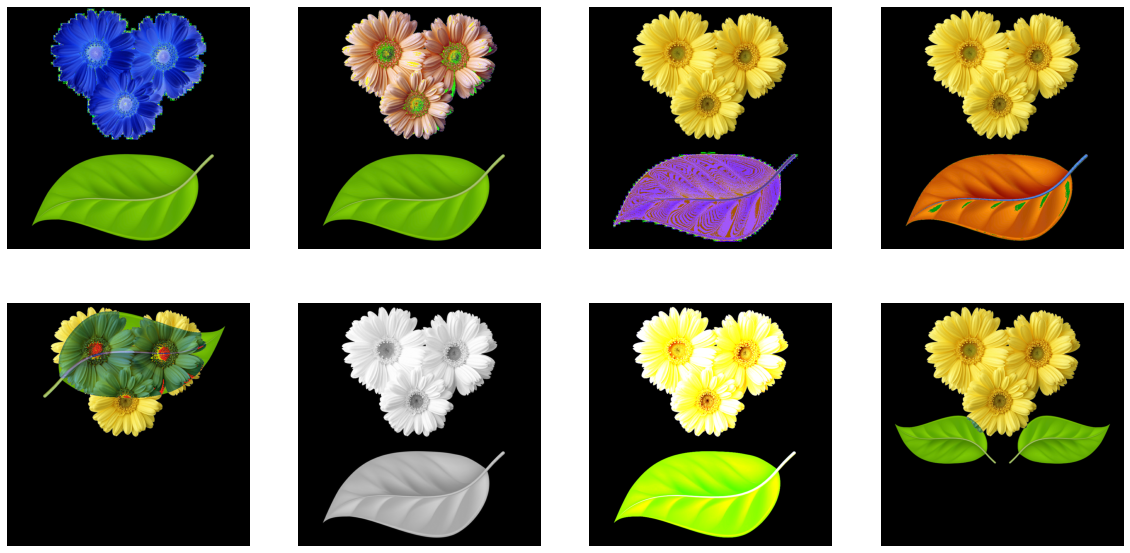

In [40]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(241)
ax.imshow(test_1)
ax.axis('off')

ax = fig.add_subplot(242)
ax.imshow(test_2)
ax.axis('off')

ax = fig.add_subplot(243)
ax.imshow(test_3)
ax.axis('off')

ax = fig.add_subplot(244)
ax.imshow(test_4)
ax.axis('off')

ax = fig.add_subplot(245)
ax.imshow(test_5)
ax.axis('off')

ax = fig.add_subplot(246)
ax.imshow(test_6)
ax.axis('off')

ax = fig.add_subplot(247)
ax.imshow(test_7)
ax.axis('off')

ax = fig.add_subplot(248)
ax.imshow(test_8)
ax.axis('off')

plt.show()